# K-means clustering

## import library

In [294]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [295]:
fname_data = 'assignment_11_data.csv'

feature = np.genfromtxt(fname_data, delimiter=',')
print(feature.shape)
print('feature',feature)

x = feature[:,0]
y = feature[:,1]
#print('x',x)
#print('y',y)
#print(feature)
number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

(1000, 2)
feature [[-2.78158782  6.13851704]
 [-5.79072687  3.00770345]
 [-8.85288476  3.99889271]
 ...
 [ 8.01075285  9.06955099]
 [ 1.12859575 -2.53389057]
 [ 0.03723381  8.87194034]]
number of data : 1000
number of feature : 2


## plot the input data

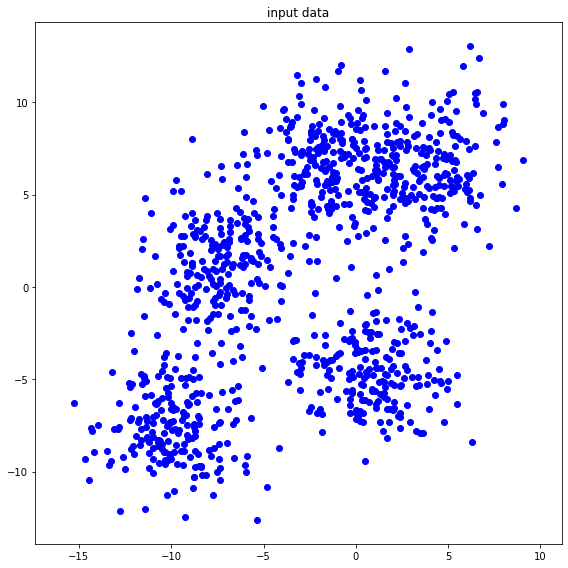

In [296]:
plt.figure(figsize=(8,8))   
plt.title('input data')

plt.scatter(x,y, c="b", marker="o")

plt.axis('equal')
plt.tight_layout()
plt.show()

## compute distance
### feature : $n \times m$, center : $1 \times m$, distance : $n \times 1$
### $n$ : number of data, $m$ : number of features

In [297]:
def compute_distance( feature, center ):
    imsi = center
    for i in range(number_data -1):
        imsi = np.vstack( [imsi,center] )
    feature = np.square(feature - center)
    distance = feature.sum(axis=1)
    
    return distance

## compute centroid
### feature : $n \times m$, label_feature : $n \times 1$, value_label : $1 \times 1$, centroid : $1 \times m$
### $n$ : number of data, $m$ : number of features

In [298]:
def compute_centroid(feature, label_feature, value_label ):
    centroid     =  np.zeros( (1, number_feature))
    count = 0
    for j in range(number_data):
        if (label_feature[j] == value_label):
          
            centroid = feature[j] + centroid
            count = count +1
    
    if ( count !=0 ):
        centroid = centroid/count

    return centroid

## compute label
### distance : $n \times k$, label_feature : $n \times 1$
### $n$ : number of data, $k$ : number of clusters

In [299]:
def compute_label(distance):
    label_feature= np.argmin( distance, axis = 1 )
    
    return label_feature


In [300]:
def compute_loss(distance, label_feature):
    loss = 0
    for i in range(number_data):
        l = int(label_feature[i])
        loss += distance[i][l]
    
    loss = loss/number_data
    
    return loss

In [301]:
# ===================================================
# assign the number of clusters and iterations
number_cluster      = 10
number_iteration    = 80
# ===================================================

In [302]:
distance            = np.zeros(shape=(number_data, number_cluster))
centroid            = np.zeros(shape=(number_cluster, number_feature))
loss_iteration      = np.zeros(shape=(number_iteration, 1))
centroid_iteration  = np.zeros(shape=(number_iteration, number_cluster, number_feature))
label_cluster = np.zeros ( shape = (number_data, number_cluster) )
label_feature = np.random.randint(number_cluster, size = number_data)

for i in range(number_iteration):

    for k in range(number_cluster):
        
        centroid[k] = compute_centroid(feature, label_feature, k)
        if ( centroid[k][0] == 0 and centroid[k][1] == 0 ):
            centroid[k] = centroid_iteration[i-1][k]
        distance[:,k] = compute_distance(feature, centroid[k])
    
    label_feature = compute_label(distance)
    centroid_iteration[i] = centroid
    #print('c',centroid)
    #print('ci',centroid_iteration[i])
    
    loss = compute_loss (distance,label_feature)
    loss_iteration[i] = loss
    
    print('lo',loss_iteration[i])
    

for i in range(number_data):
    for j in range(number_cluster):
        if( label_feature[i] == j):
            label_cluster[i][j] = 1


lo [50.65821086]
lo [10.87532145]
lo [7.11293298]
lo [5.92936927]
lo [5.41466622]
lo [5.16757975]
lo [5.08966458]
lo [5.06238334]
lo [5.04923504]
lo [5.03880871]
lo [5.01804072]
lo [5.01108373]
lo [5.00730416]
lo [5.00273264]
lo [5.00061272]
lo [4.99806463]
lo [4.99264723]
lo [4.99104517]
lo [4.99050291]
lo [4.99013804]
lo [4.98958032]
lo [4.98943381]
lo [4.98929012]
lo [4.98929012]
lo [4.98929012]
lo [4.98929012]
lo [4.98929012]
lo [4.98929012]
lo [4.98929012]
lo [4.98929012]
lo [4.98929012]
lo [4.98929012]
lo [4.98929012]
lo [4.98929012]
lo [4.98929012]
lo [4.98929012]
lo [4.98929012]
lo [4.98929012]
lo [4.98929012]
lo [4.98929012]
lo [4.98929012]
lo [4.98929012]
lo [4.98929012]
lo [4.98929012]
lo [4.98929012]
lo [4.98929012]
lo [4.98929012]
lo [4.98929012]
lo [4.98929012]
lo [4.98929012]
lo [4.98929012]
lo [4.98929012]
lo [4.98929012]
lo [4.98929012]
lo [4.98929012]
lo [4.98929012]
lo [4.98929012]
lo [4.98929012]
lo [4.98929012]
lo [4.98929012]
lo [4.98929012]
lo [4.98929012]
lo [4.

In [303]:
#print(label_cluster)

## plot the results

In [304]:
def plot_data(feature):
    
    plt.figure(figsize=(8,8))   
    plt.title('input data')

    plt.scatter(x,y, c="b", marker="o")

    plt.axis('equal')
    plt.tight_layout()
    plt.show()

In [305]:
def plot_loss_curve(loss_iteration):
    
    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    
    plt.title('loss')
    plt.plot(loss_iteration, color = 'red')

    plt.xlabel('iteration')
    plt.ylabel('loss')    

    plt.tight_layout()
    plt.show()

In [306]:
def plot_centroid(centroid_iteration):
    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    plt.title('centroid')
    
    for i in range(number_cluster):
        s=str(i)
        plt.plot(centroid_iteration[:,i,0],centroid_iteration[:,i,1], ls='-', ms=3, markevery=[0,-1], label='Cluster ='+s)
    
    
    plt.scatter(centroid_iteration[0,:,0],centroid_iteration[0,:,1], c="b", marker="o",label="initial")
    plt.scatter(centroid_iteration[-1,:,0],centroid_iteration[-1,:,1], c="r", marker="s",label="final")
    
    plt.xlabel('iteration')
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

In [307]:
def plot_cluster(feature, label_feature, label_cluster):

    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    plt.title('Cluster')
    color_num = label_cluster.shape[1]
    x = feature[:,0]
    y = feature[:,1]
    plt.scatter(x,y,c=label_feature,cmap=plt.cm.get_cmap('Set3',color_num ),s=23)
    plt.colorbar(ticks=range(color_num),label='Cluster')
    
    plt.tight_layout()
    plt.show()


***

# results

***

1. plot the input data

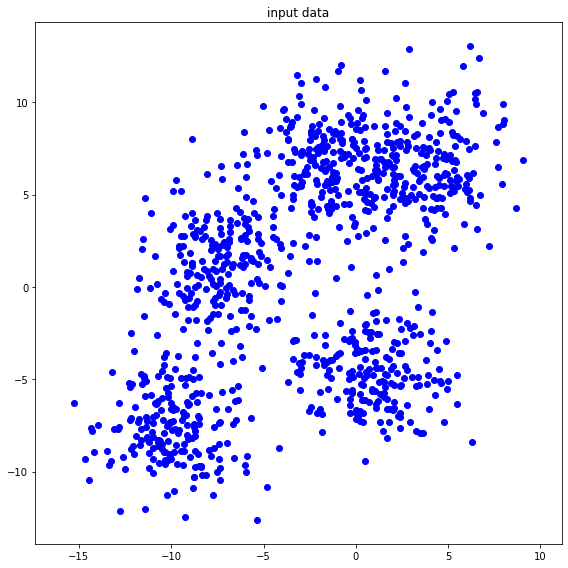

In [290]:
plot_data(feature)

***

2. plot the loss over the iterations with the number of clusters being 5

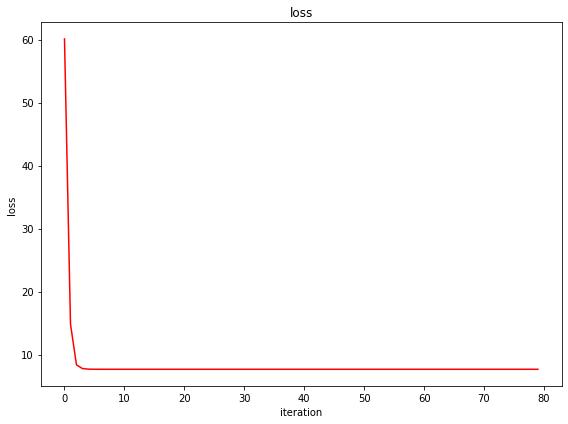

In [291]:
plot_loss_curve(loss_iteration)

***

3. plot the trajectory of the centroid for each cluster (blue circle for the initial and red square for the final) with the number of clusters being 5

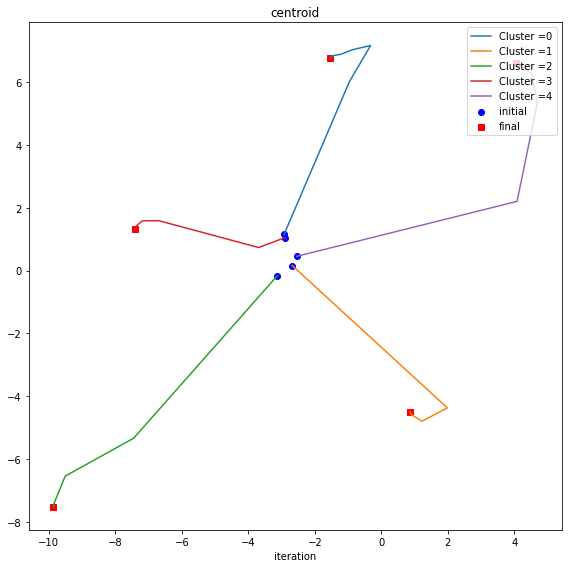

In [292]:
plot_centroid(centroid_iteration)

***

4. plot the final clustering result with the number of clusters being 5

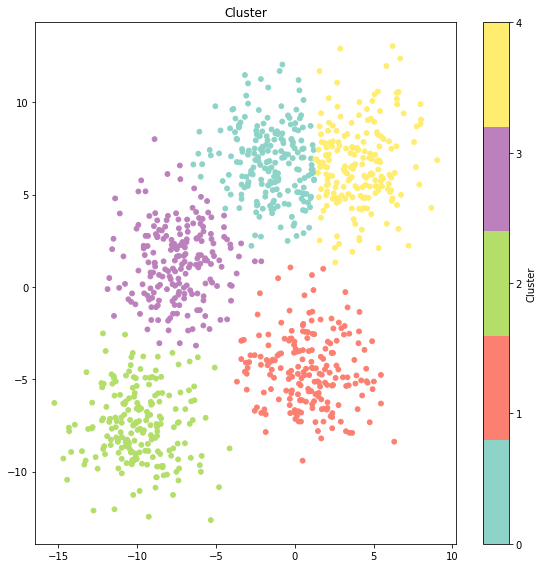

In [293]:
plot_cluster(feature, label_feature, label_cluster)

***

5. plot the loss over the iterations with the number of clusters being 10

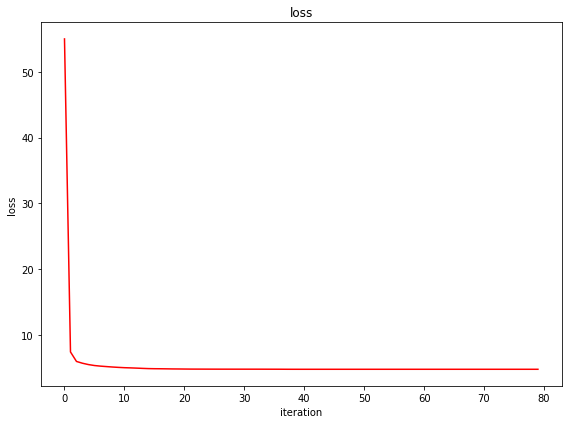

In [223]:
plot_loss_curve(loss_iteration)

***

6. plot the trajectory of the centroid for each cluster (blue circle for the initial and red square for the final) with the number of clusters being 10

AttributeError: 'PathCollection' object has no property 'markevery'

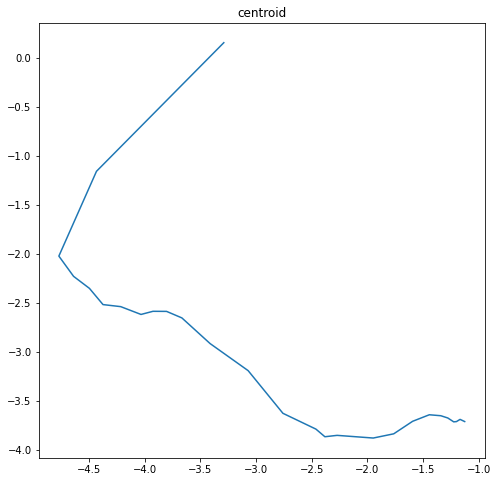

In [230]:
plot_centroid(centroid_iteration)

***

7. plot the final clustering result with the number of clusters being 10

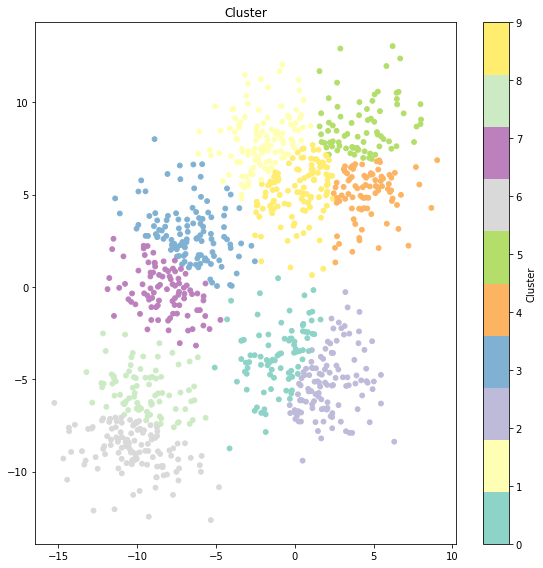

In [225]:
plot_cluster(feature, label_feature, label_cluster)

***